# Sentiment Analysis for Game Scripts
(in Japanese and English) 

Polished offshoot of a project originally from my Spring 2023 semester. The previous project used Stanford Coda instead of NLTK for English tokenization, and NLTK instead of MeCab for Japanese tokenization. I've rewritten large portions of the code to be more readable (and hopefully troubleshoot-able), as well as to more easily extend for applications concerning sentiment analysis for documents in both English and Japanese.  

For this example, however, we'll be using some example text from the visual novel "Higurashi: When They Cry", originally written in Japanese and later translated to English. We'll be pre-processing the source text per-language, tokenizing it, then running it into a sentiment analysis model from Huggingface. Finally, we'll be viewing the results of our analysis using matplotlib, and drawing some (tentative) conclusions from the data we extracted.  

In [1]:
# Import modules for tokenization, file handling
# Here we'll be using NLTK (for English text), punkt, codecs, and regular expressions 

import nltk
import nltk.tokenize.punkt
import codecs
import re
from nltk import word_tokenize
from nltk.tokenize.punkt import PunktParameters
from nltk.corpus import stopwords

In [2]:
# Used for extracting utf-8 text from pdf files, use if necessary
import pdfminer
from pdfminer.high_level import extract_text

def extract_pdf(input_file_jp, input_file_eng, output_file_eng, output_file_jp):
    
    # A function to extract text from ENG+JP pdf file pairs, outputs a txt file pair
    text_jp = extract_text(input_file_jp) # Using pdfminer.six for text extraction
    text_eng = extract_text(input_file_eng)
    
    # Write text to utf-8 txt files 
    with open(output_file_jp, 'w+', encoding='utf-8') as text_out_jp:
        text_out_jp.write(text_jp) 
    with open(output_file_eng, 'w+', encoding='utf-8') as text_out_eng:
        text_out_eng.write(text_eng)

extract_pdf('pdf_examples/exampleScript1_jp.pdf', 'pdf_examples/exampleScript1_eng.pdf', 'pdf_examples/output_ENG.txt', 'pdf_examples/output_JP.txt')

PDFSyntaxError: No /Root object! - Is this really a PDF?

In [3]:
def pre_strip_text_eng(input_txt):
    
    # Remove unnecessary characters in English txt input files
    text = codecs.open(input_txt, 'r', encoding='utf-8').read()
    
    stripped_text = re.sub(r'\d+', '', text) # RegEx to remove digits 
    stripped_text = re.sub(r'[^\w\s]', '', text) # RegEx to remove special chars
    
    return stripped_text

In [4]:
# Strip the English text 
higurashi_stripped = pre_strip_text_eng('pdf_examples/higurashiTest.txt')

# Tokenize the text 
tokens = nltk.word_tokenize(higurashi_stripped)

print(tokens)

['The', 'Seventh', 'Mart', 'was', 'a', 'bargain', 'supermarket', 'with', 'food', 'and', 'alcohol', 'Whats', 'this', 'Keiichi', 'So', 'many', 'Theres', 'no', 'reason', 'to', 'get', 'all', 'the', 'different', 'kinds', 'is', 'there', 'I', 'flopped', 'all', 'the', 'different', 'colored', 'cup', 'noodle', 'bowls', 'into', 'the', 'cart', 'Cup', 'noodles', 'have', 'gotten', 'so', 'elaborate', 'recently', 'and', 'there', 'are', 'a', 'bunch', 'of', 'different', 'types', 'I', 'want', 'to', 'try', 'each', 'of', 'them', 'at', 'least', 'once', 'I', 'knew', 'it', 'was', 'pretty', 'selfish', 'of', 'me', 'but', 'I', 'thought', 'Id', 'at', 'least', 'give', 'it', 'a', 'try', 'Keiichi', 'Buy', 'them', 'in', 'the', 'big', 'case', 'Its', 'cheaper', 'Dad', 'faltered', 'Well', 'I', 'had', 'a', 'feeling', 'itd', 'end', 'up', 'like', 'this', 'Dad', 'knew', 'there', 'was', 'no', 'point', 'in', 'him', 'butting', 'in', 'Then', 'Id', 'only', 'get', 'to', 'eat', 'one', 'kind', 'Id', 'get', 'bored', 'with', 'it', 'I

In [5]:
def pre_strip_text_jp(input_file):
    
    # A function to preprocess Japanese text from input files. 
    text_in = codecs.open(input_file, 'r', encoding='utf-8').read() # Read text
    
    pattern = re.compile(r'([一-龯ぁ-んァ-ン])') # RegEx to match against
    
    stripped_list = pattern.findall(text_in)
    stripped_string = ''

    for item in stripped_list:
        stripped_string += item
    
    return stripped_string

In [6]:
# Strip the Japanese text 
higurashi_stripped_jp = pre_strip_text_jp('pdf_examples/higurashiTestJP.txt')
print(higurashi_stripped_jp)

セブンスマトにてセブンスマトは市内にある酒類食料品の安売量販店だセブンスマトは市内にある酒類食料品の安売量販店だなぁに圭一こんなにたくさん全部違う種類にすることはないでしょなぁに圭一こんなにたくさん全部違う種類にすることはないでしょ色とりどりのカップめんをどっさりとカトに載せたんだ色とりどりのカップめんをどっさりとカトに載せたんだ最近のカップめんは凝ってて種類も多いんだよどれも一通りは食ってみたいし最近のカップめんは凝ってて種類も多いんだよどれも一通りは食ってみたいし半ばわがままだとはわかっていたが一応はと思っての挑戦だった半ばわがままだとはわかっていたが一応はと思っての挑戦だった圭一箱売りしてるのにしなさい安いから圭一箱売りしてるのにしなさい安いから親父が渋る親父が渋るまぁこういう展開は読めていたまぁこういう展開は読めていた親父が出てきたらどうしようもない親父が出てきたらどうしようもないそれじゃ種類しか食えないよ飽きちゃうってそれじゃ種類しか食えないよ飽きちゃうって形式だけの抵抗だ形式だけの抵抗だ心の中では早に諦めどのラメンの箱を買うか迷っていた心の中では早に諦めどのラメンの箱を買うか迷っていた決められないならお母さんが決めちゃうわよ決められないならお母さんが決めちゃうわよそう急かされても困るそう急かされても困る手早く目当てのラメンの箱を探しに行く手早く目当てのラメンの箱を探しに行く豚骨ショウガ味デカカップねぇ圭一もう少し普通のにしない豚骨ショウガ味デカカップねぇ圭一もう少し普通のにしないお袋に選ばせると醤油味だと塩味だの手堅いチョイスに固まる傾向があるお袋に選ばせると醤油味だと塩味だの手堅いチョイスに固まる傾向がある豚骨はうまいんだよ大盛りだけど大味ってわけじゃないし豚骨はうまいんだよ大盛りだけど大味ってわけじゃないし回想の中の俺が自らの選択したラメンの正当性を主張している回想の中の俺が自らの選択したラメンの正当性を主張しているこのすでにラミネトでパッキングされてしまった終わってしまった時間の世界で振り返るなんてことができるわけがないこのすでにラミネトでパッキングされてしまった終わってしまった時間の世界で振り返るなんてことができるわけがないだから俺にできるのはこの時間の俺の視覚と聴覚気配をさらに鋭敏にすることだけだだから俺にできるのはこの時間の俺の視覚と聴覚気配

In [7]:
from natto import MeCab # Import MeCab for text processing 
import urllib
from urllib.request import urlopen # Import urllib and urlopen 
import certifi
import ssl 

# Make sure there is a valid SSL context for urllib
ssl_context = ssl.create_default_context(cafile=certifi.where())

nm = MeCab() # Initialize MeCab

In [8]:
def remove_stopwords_eng(input_text):
    
    # A function to remove stopwords in English text
    stop_words = set(stopwords.words('english'))
    
    # Add non stopwords to a list 
    filtered_tokens = [word for word in input_text if word not in stop_words]
    
    return filtered_tokens

In [9]:
# Remove stopwords from the text
filtered_tokens_eng = remove_stopwords_eng(tokens)

print(filtered_tokens_eng)

['The', 'Seventh', 'Mart', 'bargain', 'supermarket', 'food', 'alcohol', 'Whats', 'Keiichi', 'So', 'many', 'Theres', 'reason', 'get', 'different', 'kinds', 'I', 'flopped', 'different', 'colored', 'cup', 'noodle', 'bowls', 'cart', 'Cup', 'noodles', 'gotten', 'elaborate', 'recently', 'bunch', 'different', 'types', 'I', 'want', 'try', 'least', 'I', 'knew', 'pretty', 'selfish', 'I', 'thought', 'Id', 'least', 'give', 'try', 'Keiichi', 'Buy', 'big', 'case', 'Its', 'cheaper', 'Dad', 'faltered', 'Well', 'I', 'feeling', 'itd', 'end', 'like', 'Dad', 'knew', 'point', 'butting', 'Then', 'Id', 'get', 'eat', 'one', 'kind', 'Id', 'get', 'bored', 'I', 'resisting', 'formality', 'I', 'already', 'given', 'inside', 'wasnt', 'sure', 'case', 'noodles', 'get', 'If', 'cant', 'pick', 'Mommy', 'pick', 'You', 'dont', 'rush', 'I', 'quickly', 'search', 'cases', 'noodles', 'I', 'want', 'Pork', 'bone', 'Ginger', 'large', 'cup', 'Hey', 'Keiichi', 'cant', 'get', 'normal', 'one', 'If', 'I', 'let', 'Mom', 'pick', 'shed',

In [10]:
# Importing konoha for Japanese sentence tokenization
from konoha import SentenceTokenizer
from konoha import WordTokenizer

In [11]:
def jp_sent_tokenizer(input_text):
    
    # A function to tokenize our Japanese input text
    # text_in = codecs.open(input_file, 'r', encoding='utf-8').read()
    
    # Initialize sentence and word tokenizers from MeCab
    sent_tokenizer = SentenceTokenizer('MeCab')
    word_tokenizer = WordTokenizer('MeCab')
    
    tokenized_sentences = sent_tokenizer.tokenize(input_text)
    tokenized_words = word_tokenizer.tokenize(str(tokenized_sentences))
    tokenized_words = [str(word) for word in tokenized_words]
    
    return tokenized_words 

In [12]:
def remove_stopwords_jp(input_tokens):
    
    # A function to remove stopwords in Japanese text
    
    #stopwordsiso
    iso_path = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ja/master/stopwords-ja.txt"
    iso_file = urllib.request.urlopen(iso_path, context=ssl_context)
    
    stop_words = [line.decode('utf-8').strip() for line in iso_file]
    stop_words = [word for word in stop_words if not word==u'']
    stop_words = set(stop_words)
    
    output_tok = [word for word in input_tokens if word not in stop_words]
    output = []
    
    pattern = re.compile(r'([一-龯ぁ-んァ-ン])') # RegEx to match against
    
    for string in output_tok:
        if re.match(pattern, string):
            output.append(string)
        
    return output

In [13]:
# Tokenize the Japanese sentences 
higurashi_sentences_jp = jp_sent_tokenizer(higurashi_stripped_jp)

# Remove stopwords
filtered_tokens_jp = remove_stopwords_jp(higurashi_sentences_jp)
print(filtered_tokens_jp)

['セブンスマト', 'セブンスマト', '市内', '酒類', '食料', '品', '安', '売', '量販', '店', 'セブンスマト', '市内', '酒類', '食料', '品', '安', '売', '量販', '店', 'なぁ', '圭一', 'こんなに', 'たくさん', '全部', '違う', '種類', 'でしょ', 'なぁ', '圭一', 'こんなに', 'たくさん', '全部', '違う', '種類', 'でしょ', '色とりどり', 'カップめん', 'どっさり', 'カト', '載せ', '色とりどり', 'カップめん', 'どっさり', 'カト', '載せ', '最近', 'カップめん', '凝っ', '種類', '多い', 'よ', 'どれ', '一', '通り', '食っ', 'み', 'たい', '最近', 'カップめん', '凝っ', '種類', '多い', 'よ', 'どれ', '一', '通り', '食っ', 'み', 'たい', '半ば', 'わがまま', 'わかっ', '一応', '思っ', '挑戦', '半ば', 'わがまま', 'わかっ', '一応', '思っ', '挑戦', '圭', '一', '箱', '売り', 'てる', 'なさい', '安い', '圭', '一', '箱', '売り', 'てる', 'なさい', '安い', '親父', '渋る', '親父', '渋る', 'まぁ', 'こういう', '展開', '読め', 'まぁ', 'こういう', '展開', '読め', '親父', '出', 'たら', 'どう', 'しよう', '親父', '出', 'たら', 'どう', 'しよう', 'じゃ', '種類', 'しか', '食え', 'よ', '飽き', 'ちゃう', 'って', 'じゃ', '種類', 'しか', '食え', 'よ', '飽き', 'ちゃう', 'って', '形式', 'だけ', '抵抗', '形式', 'だけ', '抵抗', '心', '中', '早', '諦め', 'ラメン', '箱', '買う', '迷っ', '心', '中', '早', '諦め', 'ラメン', '箱', '買う', '迷っ', '決め', 'お母さん', '決め', 'ちゃう', 'わ', 'よ', '決

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [15]:
# Import HF Transformers, json
from transformers import pipeline
import json

dssc = pipeline( # Define dssc, here we're using distilBERT
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
    top_k=None
)

values_EN = [] # List for English sentiment values
values_JP = [] # List for Japanese sentiment values

def sentiment_analysis(input_en, input_jp):
    
    # Function to take in lists of tokens and append each token's sentiment valence to lists
    for token in input_en:
        values_EN.append(dssc(token))
    for token in input_jp:
        values_JP.append(dssc(token))
    


In [31]:
sentiment_analysis(filtered_tokens_eng, filtered_tokens_jp)

In [32]:
print(values_EN)

[[[{'label': 'positive', 'score': 0.5080673694610596}, {'label': 'negative', 'score': 0.2674199640750885}, {'label': 'neutral', 'score': 0.22451266646385193}]], [[{'label': 'positive', 'score': 0.607921838760376}, {'label': 'negative', 'score': 0.19788922369480133}, {'label': 'neutral', 'score': 0.1941889524459839}]], [[{'label': 'positive', 'score': 0.5542969703674316}, {'label': 'negative', 'score': 0.23614606261253357}, {'label': 'neutral', 'score': 0.20955702662467957}]], [[{'label': 'positive', 'score': 0.5641307830810547}, {'label': 'negative', 'score': 0.24552078545093536}, {'label': 'neutral', 'score': 0.19034847617149353}]], [[{'label': 'positive', 'score': 0.6122827529907227}, {'label': 'neutral', 'score': 0.19978976249694824}, {'label': 'negative', 'score': 0.1879274696111679}]], [[{'label': 'positive', 'score': 0.7015318870544434}, {'label': 'neutral', 'score': 0.20092147588729858}, {'label': 'negative', 'score': 0.09754664450883865}]], [[{'label': 'negative', 'score': 0.53

In [33]:
print(values_JP)

[[[{'label': 'positive', 'score': 0.5096811056137085}, {'label': 'negative', 'score': 0.28245988488197327}, {'label': 'neutral', 'score': 0.20785899460315704}]], [[{'label': 'positive', 'score': 0.5096811056137085}, {'label': 'negative', 'score': 0.28245988488197327}, {'label': 'neutral', 'score': 0.20785899460315704}]], [[{'label': 'positive', 'score': 0.5059274435043335}, {'label': 'neutral', 'score': 0.26195162534713745}, {'label': 'negative', 'score': 0.23212085664272308}]], [[{'label': 'positive', 'score': 0.5180309414863586}, {'label': 'neutral', 'score': 0.2440415769815445}, {'label': 'negative', 'score': 0.23792748153209686}]], [[{'label': 'positive', 'score': 0.5641340017318726}, {'label': 'neutral', 'score': 0.24686923623085022}, {'label': 'negative', 'score': 0.18899677693843842}]], [[{'label': 'positive', 'score': 0.7029010057449341}, {'label': 'neutral', 'score': 0.16502179205417633}, {'label': 'negative', 'score': 0.13207726180553436}]], [[{'label': 'positive', 'score': 0

In [34]:
import numpy as np
import pandas as pd

# Transform each sublist into its own element in a list
flat_list_eng = [element for sublist in values_EN for element in sublist]
flat_list_jp = [element for sublist in values_JP for element in sublist]

# Flatten the sublists
flat_list_eng = [element for sublist in flat_list_eng for element in sublist]
flat_list_jp = [element for sublist in flat_list_jp for element in sublist]

# From here, we can make a DataFrame in pandas:
df_eng = pd.DataFrame.from_records(flat_list_eng)
df_jp = pd.DataFrame.from_records(flat_list_jp)

# View the raw DataFrames
df_jp.head(10)

,label,score
0,positive,0.509681
1,negative,0.282460
2,neutral,0.207859
3,positive,0.509681
4,negative,0.282460
5,neutral,0.207859
6,positive,0.505927
7,neutral,0.261952
8,negative,0.232121
9,positive,0.518031


In [35]:
# Pivot the raw DF such that we have 3 columns  
df_eng = df_eng.pivot(columns='label', values='score')
df_jp = df_jp.pivot(columns='label', values='score')
df_jp.head(10)

label,negative,neutral,positive
0,NaN,NaN,0.509681
1,0.282460,NaN,NaN
2,NaN,0.207859,NaN
3,NaN,NaN,0.509681
4,0.282460,NaN,NaN
5,NaN,0.207859,NaN
6,NaN,NaN,0.505927
7,NaN,0.261952,NaN
8,0.232121,NaN,NaN
9,NaN,NaN,0.518031


In [36]:
# Each entry from the sentiment analysis model will generate 3 sequential entries in the DataFrame
# So, we generate a new index column for the DataFrame and transform around this index

def make_grouping_index(input_df):
    i = 0
    s = 0
    vals = []
    while i <= len(input_df.index) - 1:
        vals.append(s)
        i = i + 1 
        if i % 3 == 0:
            s = s + 1    

    input_df['index'] = vals # Adding index to the DataFrame
    
    return input_df

In [37]:
df_eng = make_grouping_index(df_eng)
df_jp = make_grouping_index(df_jp)

df_jp.tail(10) # DataFrame after index column insertion

label,negative,neutral,positive,index
6890,0.207190,NaN,NaN,2296
6891,NaN,NaN,0.439948,2297
6892,NaN,0.312055,NaN,2297
6893,0.247997,NaN,NaN,2297
6894,NaN,NaN,0.533698,2298
6895,NaN,0.276846,NaN,2298
6896,0.189456,NaN,NaN,2298
6897,NaN,NaN,0.655514,2299
6898,NaN,0.187866,NaN,2299
6899,0.156619,NaN,NaN,2299


In [38]:
def group_by_grouping_index(input_df):
    
    # A function to finish transforming the DataFrame
    input_df = input_df.groupby('index').first().reset_index() # Transform the DF by grouping by the index
    input_df.drop('index', axis=1, inplace=True) # Drop the inserted column
    
    return input_df

In [39]:
df_eng = group_by_grouping_index(df_eng)
df_jp = group_by_grouping_index(df_jp)

df_eng.head(10) # View the transformed DataFrame

label,negative,neutral,positive
0,0.267420,0.224513,0.508067
1,0.197889,0.194189,0.607922
2,0.236146,0.209557,0.554297
3,0.245521,0.190348,0.564131
4,0.187927,0.199790,0.612283
5,0.097547,0.200921,0.701532
6,0.534878,0.164306,0.300816
7,0.331293,0.290150,0.378556
8,0.177718,0.195488,0.626794
9,0.184375,0.257877,0.557748


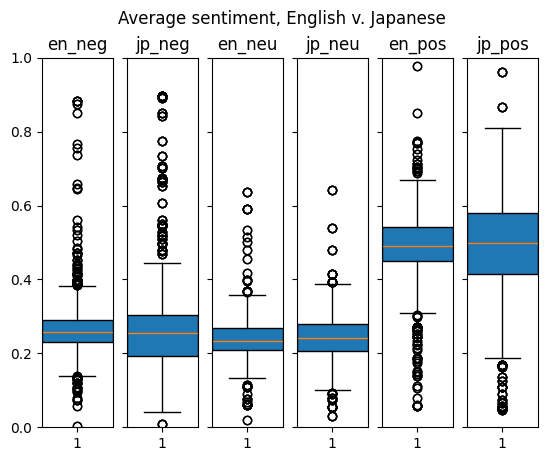

In [69]:
# Running visualization on our data
import matplotlib
from matplotlib import pyplot as plt 
import numpy as np

fig, axs = plt.subplots(1, 6, sharey=True)
fig.suptitle('Average sentiment, English v. Japanese')

axs[0].boxplot(df_eng['negative'], widths=1, patch_artist=True, showmeans=False)
axs[0].set_title('en_neg')

axs[1].boxplot(df_jp['negative'], widths=1, patch_artist=True, showmeans= False)
axs[1].set_title('jp_neg')

axs[2].boxplot(df_eng['neutral'], widths=1, patch_artist=True, showmeans=False)
axs[2].set_title('en_neu')

axs[3].boxplot(df_jp['neutral'], widths=1, patch_artist=True, showmeans=False)
axs[3].set_title('jp_neu')

axs[4].boxplot(df_eng['positive'], widths=1, patch_artist=True, showmeans=False)
axs[4].set_title('en_pos')

axs[5].boxplot(df_jp['positive'], widths=1, patch_artist=True, showmeans=False)
axs[5].set_title('jp_pos')

for ax in axs: 
    ax.set(ylim=(0, 1))

plt.show()

## Conclusion

Overall, our data shows that sentiment valence appears to be well-preserved between the original Japanese text and the English-translated counterpart. While this is only one example, I think that these similarities in the data speak to the quality of the translation. 

Going forward, I'm interested in testing this hypothesis against more examples from Japanese Visual Novels (VNs), as it's a genre I personally enjoy and have a connection to. To accomplish this, I plan on investigating various fan and official translations' sentiment valence scores, checking (a) if the translation is regarded as 'accurate' by fans and (b) if similarities in the data correlate to these fan perceptions.  

This project was a lot of fun, from its infancy in my Junior year NLP course to creating a polished notebook, to hopefully extending it in the future. Thank you for reading! 